<h1>Task 1: Exploratory Data Analysis (EDA) on Retail Sales Data

</h1>

<h3>1.Data Loading and Cleaning
</h3>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('retail_sales_dataset.csv')
df

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


In [7]:
df.head(5)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [9]:
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [10]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.drop_duplicates(inplace = True)

In [13]:
df['Date'] = pd.to_datetime(df['Date'])


<h3>2.Descriptive Statistics</h3>

In [14]:
mean_sales = df['Total Amount'].mean()
mean_sales

np.float64(456.0)

In [15]:
median_sales = df['Total Amount'].median()
median_sales

135.0

In [16]:
mode_sales = df['Total Amount'].mode()[0]
mode_sales

np.int64(50)

In [17]:
std_sales = df['Total Amount'].std()
std_sales

559.997631555123

<h3>3.Time Series Analysis</h3>

In [18]:
daily_sales = df.groupby('Date')['Total Amount'].sum()


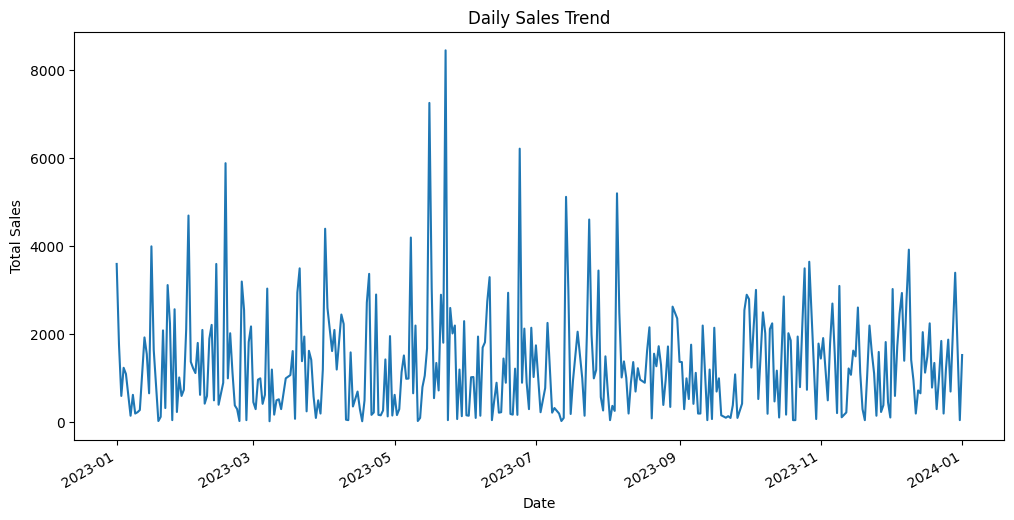

In [19]:
plt.figure(figsize=(12,6))
daily_sales.plot()
plt.title("Daily Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()


In [20]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month



In [21]:
df[['Date', 'Year', 'Month']].head()


,Date,Year,Month
0,2023-11-24,2023,11
1,2023-02-27,2023,2
2,2023-01-13,2023,1
3,2023-05-21,2023,5
4,2023-05-06,2023,5


In [22]:
monthly_sales = df.groupby(['Year','Month'])['Total Amount'].sum().reset_index()


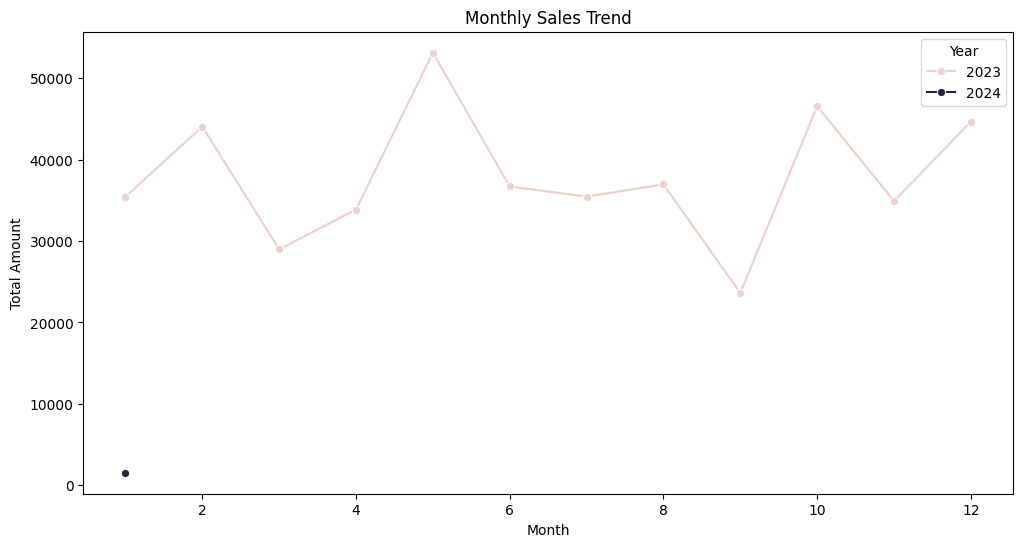

In [23]:
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='Month', y='Total Amount', hue='Year', marker='o')
plt.title("Monthly Sales Trend")
plt.show()


<h3>4.Customer And Product Analysis</h3>

In [24]:
gender_sales = df.groupby('Gender')['Total Amount'].sum()


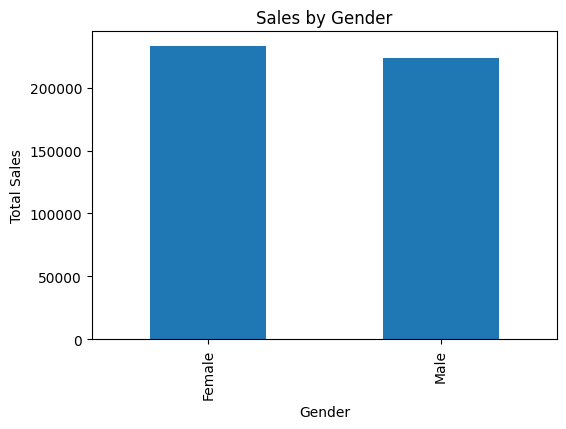

In [25]:
gender_sales.plot(kind='bar', figsize=(6,4), title='Sales by Gender')
plt.ylabel("Total Sales")
plt.show()


In [26]:
bins = [0, 18, 30, 45, 60, 100]
labels = ['Teen', 'Young Adult', 'Adult', 'Senior', 'Elder']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels)


C:\Users\Adity\AppData\Local\Temp\ipykernel_2516\1816346574.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sales = df.groupby('Age Group')['Total Amount'].sum()


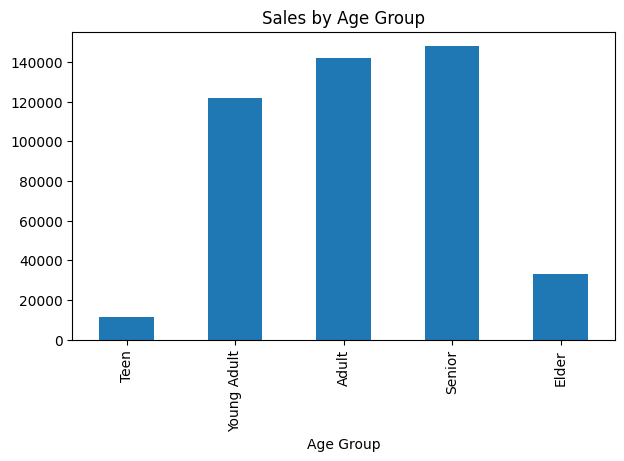

In [27]:
age_sales = df.groupby('Age Group')['Total Amount'].sum()
age_sales.plot(kind='bar', figsize=(7,4), title='Sales by Age Group')
plt.show()


In [28]:
category_sales = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending=False)


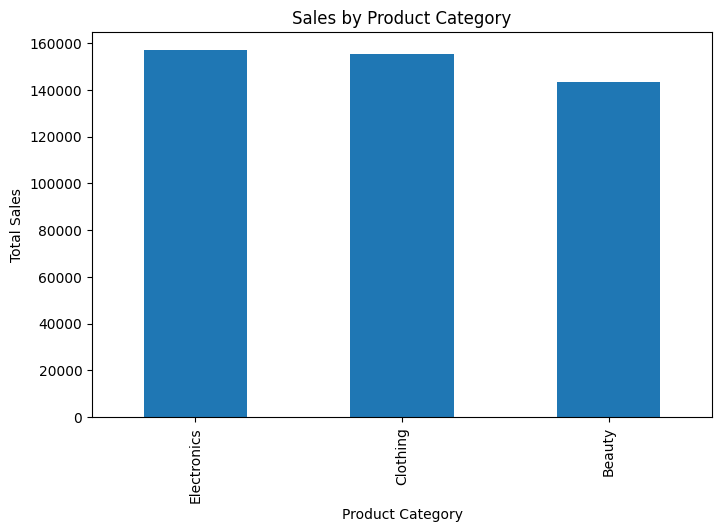

In [29]:
plt.figure(figsize=(8,5))
category_sales.plot(kind='bar')
plt.title("Sales by Product Category")
plt.ylabel("Total Sales")
plt.show()


<h3>5.Visualizations</h3>

<h4>i) Scatter Plot</h4>

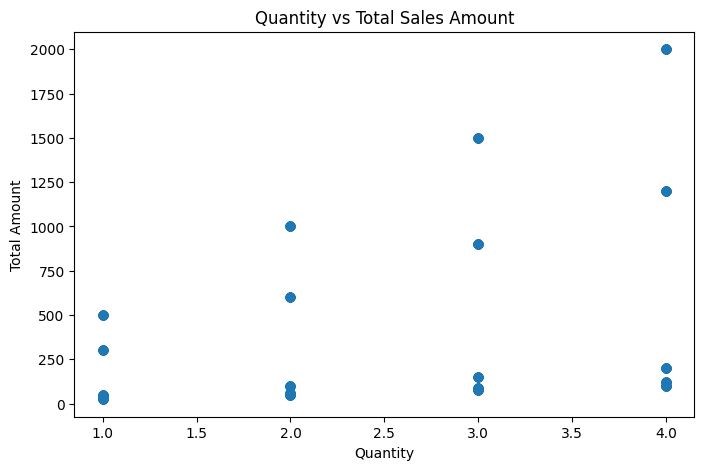

In [30]:
plt.figure(figsize=(8,5))
plt.scatter(df['Quantity'], df['Total Amount'])
plt.title("Quantity vs Total Sales Amount")
plt.xlabel("Quantity")
plt.ylabel("Total Amount")
plt.show()


<h4>ii) Histogram</h4>

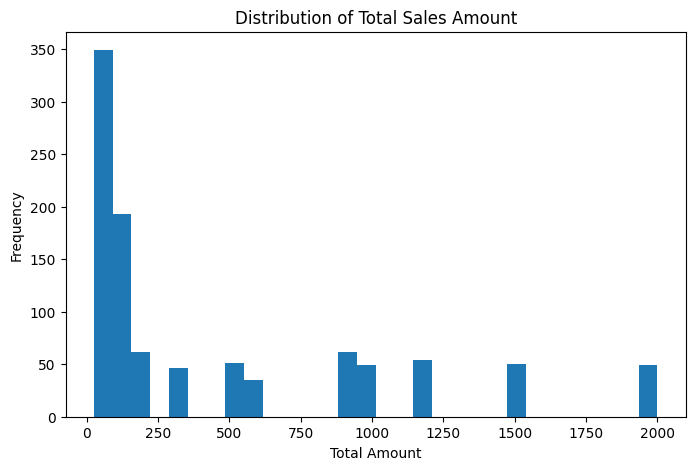

In [31]:
plt.figure(figsize=(8,5))
plt.hist(df['Total Amount'], bins=30)
plt.title("Distribution of Total Sales Amount")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.show()



<h4>iii) Correlation Analysis</h4>

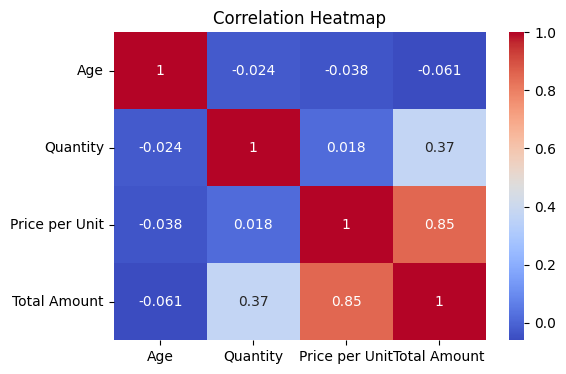

In [32]:
plt.figure(figsize=(6,4))
sns.heatmap(
    df[['Age', 'Quantity', 'Price per Unit', 'Total Amount']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap")
plt.show()


<h1>6.Recommendations</h1>

<h2>i)Focus on High-Performing Product Categories</h2>

<h3>-Visualizations show that certain product categories contribute significantly more to total revenue.</h3>

<h3>-These categories should receive priority in inventory planning and marketing campaigns.</h3>

<h2>Action:</h2>

<h3>-Increase stock availability for top-performing categories.</h3>
<h3>-Promote these categories through targeted ads and featured placements.</h3>

<h2>ii)Optimize Inventory Using Sales Trends</h2>

<h3>-Time series analysis reveals fluctuations in sales over time, indicating seasonal demand patterns.</h3>

<h3>-Sales peaks during specific months suggest higher customer demand.</h3>

<h2>Action:</h2>

<h3>-Plan inventory in advance for peak sales periods.</h3>
<h3>-Reduce overstock during low-demand periods to minimize holding costs.</h3>